In [1]:
import pandas as pd
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
import gensim
import numpy as np
import statistics

In [2]:
female_model = Word2Vec.load("C:/Users/ninat/Downloads/thesis_data/female_word2vec.model")
male_model = Word2Vec.load("C:/Users/ninat/Downloads/thesis_data/male_word2vec.model")

In [3]:
for i in female_model.wv.most_similar(positive=['beautiful'], topn=5):
    print(i)

('picturesque', 0.6621178388595581)
('bustling', 0.6389173269271851)
('scenic', 0.6367611289024353)
('stunning', 0.6342751979827881)
('scenery', 0.6338444352149963)


## Adjective categories

In [5]:
# all adjectives to compute distances to
physical_appearance = ['shorter', 'cute', 'plain', 'short', 'beautiful', 'big', 'appealing', 'grand', 'attractive', 'biggest', 'elegant', 'fascinating', 'fragile', 'pretty', 'ugly', 'blond', 'fit', 'fat', 'gorgeous', 'curvy', 'handsome', 'pleasing', 'hot', 'skinny', 'redhead', 'tiny', 'splendid', 'sexy', 'blonde', 'charming', 'small', 'unattractive', 'sized', 'muscular', 'thin', 'fashioned', 'large', 'fashionable', 'delightful', 'wider', 'basic', 'chubby', 'delicate', 'graceful', 'marvelous', 'exquisite', 'massive', 'superb', 'alluring', 'dazzling', 'good-looking', 'brunette', 'medium', 'magnificent', 'tall', 'youthful', 'larger', 'stunning', 'adorable', 'athletic', 'attractive', 'beautiful', 'big', 'blue-eyed', 'blushing', 'chubby', 'curvy', 'cute', 'fat', 'feeble', 'filthy', 'fit', 'glamorous', 'gorgeous', 'handsome', 'heavy', 'hot', 'lanky', 'large', 'lean', 'long', 'muscular', 'overweight', 'obese', 'petite', 'plain', 'pretty', 'skinny', 'slender', 'slim', 'sparkling', 'spotless', 'stunning', 'thin', 'ugliest', 'ugly', 'unattractive', 'unsightly', 'well-dressed', 'wide-eyed']

intellect_education = ['literate', 'effective', 'naive', 'moronic', 'insightful', 'well-read', 'adept', 'educational', 'brainy', 'keen', 'innovative', 'proficient', 'bright', 'alert', 'whiz', 'unintelligent', 'canny', 'ignorant', 'active', 'wise', 'sharp', 'crafty', 'ingenious', 'fresh', 'trained', 'agile', 'productive', 'advanced', 'useful', 'hardworking', 'scientific', 'stupid', 'astute', 'inventive', 'savvy', 'slow', 'ready', 'shrewd', 'deluded', 'quick', 'nimble', 'smart', 'competitive', 'numerate', 'uncultured', 'articulate', 'skull', 'qualified', 'academic', 'cultured', 'acute', 'professional', 'brisk', 'enlightening', 'successful', 'quick-witted', 'idiotic', 'irresponsible', 'foolish', 'informative', 'impertinent', 'dumb', 'uneducated', 'genius', 'academically', 'ambitious', 'pointed', 'intelligent', 'eggheaded', 'bold', 'inefficient', 'resourceful', 'smarter', 'multilingual', 'apt', 'clever', 'inactive', 'lazy', 'slick', 'illiterate', 'educated', 'genius', 'intellect', 'reasoned', 'perceptive', 'incisive', 'smart', 'deductive', 'insightful', 'meditative', 'involving', 'astute', 'intelligent', 'perceptive', 'calculating', 'logical', 'practical', 'complex', 'methodical', 'strategic', 'insightful', 'thoughtful', 'ingenious', 'robust', 'innovative', 'sophisticated', 'novel', 'imaginative', 'accomplished', 'fluent', 'significant', 'adept', 'ideal', 'smooth', 'advanced', 'industrious', 'skilled', 'competent', 'influential', 'skillful', 'constructive', 'instrumental', 'productive', 'superior', 'economical', 'proficient', 'qualified', 'expert', 'profitable', 'passionate', 'dedicated', 'studious', 'focused', 'motivated', 'driven', 'persistent', 'methodical', 'controlled', 'orderly', 'structured', 'detailed', 'precise', 'systematic', 'detail-oriented', 'accurate', 'exact', 'professional', 'punctual', 'dependable', 'resilient', 'diligent', 'disciplined']

emotionality_state_of_mind = ['contented', 'delighted', 'enjoyable', 'amazed', 'conscious', 'lively', 'hysterical', 'depressed', 'worse', 'pleased', 'awful', 'lot', 'satisfied', 'convinced', 'unhappy', 'tormented', 'lonely', 'mad', 'willing', 'viscerally', 'heartbroken', 'disappointing', 'elated', 'cheerful', 'upset', 'thrilled', 'somber', 'calm', 'fearful', 'disheartened', 'concerned', 'flabbergasted', 'scared', 'joyous', 'glad', 'sober', 'dissatisfied', 'indignant', 'inept', 'upsetting', 'excited', 'emotional', 'desperate', 'alive', 'disillusioned', 'pessimistic', 'baffled', 'distraught', 'uptight', 'unpatriotic', 'melancholy', 'depressing', 'surprised', 'apologetic', 'resentful', 'grateful', 'sickened', 'jubilant', 'clutched', 'distracted', 'merry', 'irritated', 'mournful', 'impassioned', 'unelectable', 'sullen', 'anxious', 'ashamed', 'gladly', 'sorrowful', 'distressed', 'apprehensive', 'irritable', 'bitter', 'reluctant', 'bewildered', 'fearing', 'embarrassed', 'giggly', 'happy', 'appalling', 'frustrated', 'content', 'bothered', 'compassionate', 'peaceful', 'offended', 'enraged', 'perturbed', 'disturbed', 'annoyed', 'childish', 'happier', 'furious', 'confident', 'afraid', 'optimistic', 'saddened', 'dreadful', 'hopeful', 'heated', 'uncomfortable', 'pleasant', 'exasperated', 'disappointed', 'outraged', 'frightened', 'fretful', 'empathetic', 'overjoyed', 'tragic', 'bad', 'disgusted', 'arrogant', 'confused', 'irate', 'nervous', 'tense', 'grumpy', 'happily', 'dismal', 'ecstatic', 'shocked', 'sad', 'joyful', 'worried', 'sympathetic', 'angry', 'affected', 'aroused', 'emotional', 'emotive', 'excited', 'fervent', 'fervid', 'hysterical', 'impassioned', 'livid', 'mad', 'moved', 'supercharged', 'thrilling', 'touched', 'unemotional', 'envious', 'disgusted', 'jealous', 'raged', 'alarmed', 'feared', 'hysteric', 'paniced', 'bitter', 'outraged', 'hateful', 'nervous', 'worried', 'pleasured', 'content', 'optimistic', 'relieved', 'affectionate', 'passionate', 'guilty', 'shameful', 'surprised', 'sad', 'unhappy', 'sorrowful', 'dejected', 'regretful', 'depressed', 'downcast', 'miserable', 'jolly', 'joyful', 'jovial', 'smiling', 'carefree', 'lucky', 'merry']

physical_state_condition = ['ailing', 'underdeveloped', 'ill', 'capable', 'firm', 'woozy', 'afflicted', 'tired', 'able', 'athletic', 'exasperated', 'overworked', 'fit', 'healthy', 'deceased', 'unwashed', 'thinner', 'adorable', 'drained', 'thirsty', 'exhausted', 'alive', 'epileptic', 'durable', 'diseased', 'infirm', 'weighty', 'energetic', 'awake', 'bruised', 'sick', 'incurable', 'poorly', 'sleepy', 'sporty', 'paralysed', 'unfit', 'stronger', 'disabled', 'fatigued', 'active', 'irritated', 'forceful', 'hungry', 'tall', 'strong', 'sore', 'starving', 'feverish', 'muscular', 'muscly', 'sturdy', 'strapping', 'robust', 'able-bodied', 'vigorous', 'hardy', 'fit', 'aerobicized', 'healthy', 'sporty', 'husky', 'hunky', 'beefy', 'ripped', 'shredded', 'buff', 'jacked', 'gymnastic', 'ill', 'unwell', 'poorly', 'ailing', 'indisposed', 'nauseous', 'nauseated', 'queasy', 'bilious', 'seasick', 'carsick', 'airsick', 'barfy', 'sick', 'tired', 'weak']

personality_traits = ['polite', 'brave', 'insulting', 'incompetent', 'amicable', 'naive', 'transparent', 'shameful', 'avoidable', 'awful', 'thoughtful', 'curious', 'silent', 'amiable', 'unfair', 'unthinkable', 'surprising', 'energetic', 'weirdy', 'absurd', 'reliable', 'mad', 'amusing', 'hopeless', 'comprehensive', 'friendly', 'courageous', 'ignorant', 'wacky', 'appreciative', 'silly', 'fabulous', 'affable', 'receptive', 'selfish', 'elegant', 'unpleasant', 'scared', 'nuts', 'annoying', 'toxic', 'reckless', 'forgiving', 'pessimistic', 'contentious', 'threatening', 'deluded', 'mindful', 'depressing', 'rude', 'distasteful', 'attacking', 'disagreeable', 'lovely', 'hyperactive', 'honourable', 'unacceptable', 'irritated', 'antipathetic', 'inconsistent', 'combative', 'kooky', 'aggressive', 'indefensible', 'consistent', 'inadequate', 'careful', 'affectionate', 'humble', 'trustworthy', 'independent', 'bewildered', 'progressive', 'marvellous', 'tolerant', 'louder', 'unbelievable', 'spiteful', 'inappropriate', 'pleasing', 'incisive', 'awesome', 'neighborly', 'embarrassing', 'dangerous', 'idiotic', 'critical', 'irresponsible', 'dirty', 'unjustifiable', 'robust', 'unreasonable', 'sensitive', 'pathetic', 'funny', 'peaceful', 'foolish', 'helpful', 'loyal', 'insane', 'nutty', 'superb', 'crazy', 'gentle', 'loving', 'approachable', 'furious', 'detailed', 'dreadful', 'intolerable', 'antisocial', 'lousy', 'unhelpful', 'assailing', 'violent', 'destructive', 'humorous', 'provocative', 'terrible', 'stable', 'bold', 'selfless', 'catastrophic', 'timid', 'beneficial', 'frustrating', 'unclear', 'charming', 'radical', 'unsurprising', 'intrusive', 'romantic', 'delightful', 'vital', 'favorable', 'generous', 'advancing', 'attentive', 'creative', 'unfaithful', 'unreliable', 'sympathetic', 'adaptable', 'courageous', 'giving', 'neat', 'self-confident', 'adventurous', 'creative', 'self-disciplined', 'affable', 'decisive', 'gregarious', 'non-judgemental', 'sensible', 'affectionate', 'dependable', 'hardworking', 'observant', 'sensitive', 'agreeable', 'determined', 'helpful', 'optimistic', 'shy', 'ambitious', 'diligent', 'hilarious', 'organized', 'silly', 'amiable', 'diplomatic', 'honest', 'passionate', 'sincere', 'amicable', 'discreet', 'humorous', 'patient', 'amusing', 'dynamic', 'imaginative', 'persistent', 'socialable', 'artistic', 'easy-going', 'impartial', 'pioneering', 'straight-forward', 'brave', 'independent', 'philosophical', 'sympathetic', 'bright', 'efficient', 'industrious', 'placid', 'talkative', 'broad-minded', 'energetic', 'intelligent', 'plucky', 'thoughtful', 'calm', 'enthusiastic', 'intellectual', 'polite', 'tidy', 'careful', 'extroverted', 'intuitive', 'popular', 'tough', 'charismatic', 'exuberant', 'inventive', 'trustworthy', 'charming', 'fair-minded', 'joyful', 'practical', 'unassuming', 'chatty', 'faithful', 'kind', 'pro-active', 'understanding', 'cheerful', 'fearless', 'kooky', 'quick-witted', 'upbeat', 'clever', 'forceful', 'laid-back', 'quiet', 'versatile', 'communicative', 'frank', 'likable', 'rational', 'warmhearted', 'compassionate', 'friendly', 'loving', 'reliable', 'wild', 'conscientious', 'funny', 'loyal', 'reserved', 'wise', 'considerate', 'generous', 'resourceful', 'witty', 'convivial', 'gentle', 'modest', 'romantic', 'aggressive', 'cynical', 'impolite', 'nervous', 'sneaky', 'aloof', 'deceitful', 'impulsive', 'obstinate', 'stubborn', 'defensive', 'inconsiderate', 'overcritical', 'arrogant', 'devious', 'indecisive', 'overemotional', 'sullen', 'bad-tempered', 'indiscreet', 'patronizing', 'tactless', 'belligerent', 'dishonest', 'inflexible', 'pig-headed', 'thoughtless', 'big-headed', 'domineering', 'intolerant', 'pessimistic', 'touchy', 'boastful', 'egotistical', 'introverted', 'boring', 'finicky', 'irresponsible', 'possessive', 'unpredictable', 'bossy', 'foolish', 'jealous', 'quick-tempered', 'unreliable', 'callous', 'gussy', 'lazy', 'resentful', 'untidy', 'careless', 'gullible', 'loud', 'rude', 'untrustworthy', 'clingy', 'grumpy', 'mean', 'secretive', 'vague', 'confrontational', 'hostile', 'moody', 'self-centered', 'vain', 'cowardly', 'idle', 'narrowminded', 'selfish', 'vulgar', 'cruel', 'impatient', 'nasty', 'silly', 'weak-willed']

age = ['14-year', 'older', 'adolescence', 'old', 'teenage', 'eldest', 'undergraduates', 'veteran', 'newborn', 'tired', '24-week', 'blooming', 'senior', 'infantile', 'recent', 'baby', '60-year', 'fossil', 'aged', 'premature', '21st', '90-year', 'modern', '20s', '84-year', 'bygone', '95-year', 'old-fashioned', 'babyish', 'decrepit', '13-year', 'gray', '15-year', 'younger', '27-year', '2, 517', 'adolescent', 'stillborn', '92-year', 'budding', 'fashioned', '80-year', '34-year', 'antique', 'elderly', '79-year', 'undergraduate', 'blossoming', 'teen', '22-year', 'oldest', 'mature', '38-year', 'ancient', 'youngsters', '92nd', '12-year', 'venerable', 'youthful', 'young', 'versed', 'youngest', '46-year', 'adult', 'aging', 'geriatric', 'lived', 'senescent', 'senior', 'junior', 'oldish', 'pensioned', 'retired', 'youngish', 'minor', 'underage', 'immature', 'preteen', 'babyish', 'youthful']

rela_gender_status = ['bachelor', 'married', 'joined', 'unwed', 'united', 'wedded', 'widower', 'widowed', 'marital', 'husbandless', 'spouseless', 'espoused', 'unmarried', 'unattached', 'unwedded', 'wed', 'remarriage', 'uncoupled', 'single', 'sole', 'mated', 'unmarried', 'wifeless', 'espoused', 'nonmarital', 'marital']

In [6]:
# create sets and store all adjective lists in one big list
lists = [physical_appearance] + [intellect_education] + [emotionality_state_of_mind] + [physical_state_condition] + [personality_traits] + [age] + [rela_gender_status]
sets = []

for l in range(len(lists)):
    l2 = set(lists[l])
    sets.append(list(l2))

terms = ['physical_appearance', 'intellect_education', 'emotionality_state_of_mind', 'physical_state_condition', 'personality_traits', 'age', 'rela_gender_status']

In [7]:
# remove adjectives that are not in the models
for l in sets:
    for word in l:
        if word not in female_model.wv:
            l.remove(word)
            
for l in sets:
    for word in l:
        if word not in male_model.wv:
            l.remove(word)

## Word embeddings distances

In [8]:
# list of male and female words
male_words = ["nephew", "nephews", "father", "dad", "daddies", "grandfather", "step-son", "step-sons", "men", "son-in-law", "king", "daddy", "son", "groom", "grooms", "gentleman", "gentlemen", "sir", "lad", "grandson", "grand-son", "dads", "prince", "stepfathers", "boyfriend", "males", "grandfathers", "grand-fathers", "husband", "husbands", "boy", "bachelor", "bachelors", "duke", "sirs", "papas", "heir", "uncle", "mr", "lords", "father-inlaw", "sons-in-law", "fiances","fiance", "uncles", "lads", "brother", "grandpa", "grandpas", "heirs", "male",  "grandsons", "grandsons", "boys", "he", "step-father", "bridegroom", "bridegrooms stepfather",  "mr.", "brothers", "man", "sons", "boyfriends", "he’s", "his", "him", "stepson", "stepsons", "guy", "spokesman", "spokesmen", "pa", "dude", "dudes", "paternal", "brotherhood", "countryman", "countrymen", "suitor", "macho", "papa", "strongman", "strongmen", "boyhood", "manhood", "masculine", "macho", "horsemen", "brethren", "chap", "chaps", "schoolboy", "schoolboys", "bloke", "blokes", "patriarch", "patriachy", "fatherhood", "hubby", "hubbies", "fella", "fellas","fraternal", "bro", "masculinity", "pappy", "papi", "pappies", "dada", "bf", "bfs", "knights", "knight", "menfolk", "brotherly", "manly", "pimp", "pimps", "homeboy", "homeboys", "grandnephew", "grandnephew", "grand-nephew", "grand-nephews", "nobleman", "noblemen", "dream boy", "himself", "gramps"]
female_words = ["niece", "mother", "duchesses", "mom", "belle", "belles", "mummies",  "grandmother", "landlady", "landladies", "nuns", "stepdaughter", "women", "daughter-in-law", "daughter", "queens", "brides", "lady", "queen", "matron",  "mummy", "madam", "granddaughter", "grand-daughter", "moms", "princess", "stepmothers", "stepdaughters", "girlfriend", "females", "grand-mothers", "grandmothers", "step-daughter", "nieces", "wife", "mother", "wives", "girl", "duchess", "madams", "mamas", "aunt", "princesses", "fiancee", "mrs", "ladies", "mother-in-law", "bride", "daughters-in-law", "aunts", "sister", "grandma", "grandmas", "female", "granddaughters", "grand-daughters", "girls", "she", "stepmother", "stepmother", "mrs.", "sisters", "mama", "woman", "daughters", "girlfriends", "she’s", "her", "maid", "mum", "maiden", "maidens", "dudette", "maternal", "sisterhood", "housewife", "housewives", "chick", "chicks", "mommy", "babe", "babes", "diva", "divas", "gal", "gals", "sistren", "schoolgirl", "schoolgirls", "matriarch", "matriarchy", "motherhood", "wifey", "sis", "femininity", "granny", "grannies", "mami", "momma", "gf", "gfs", "damsel", "damsels", "vixen", "vixens", "nan", "nanny", "nannies", "auntie", "womenfolk", "sisterly", "motherly", "homegirl", "homegirls", "grand-niece", "grand-nieces", "grandniece", "grandnieces", "dream girl", "madame", "herself", "hers"]

# create 2 empty list to store the words that are present in the male and female model
male = []
female = []

# in this for loop I walk through the lists, and if the words of those lists are in the dataset
# then I store them in the male and female lists which will be used for my mean word embeddings later.
for word in male_words:
    if word in female_model.wv:
        if word in male_model.wv:
            male.append(word)
            
for word in female_words:
    if word in female_model.wv:
        if word in male_model.wv:
            female.append(word)


In [9]:
# I created these two functions to calculate the distances and to calculate the means

def get_distance(word1, word2, model):
    # word1 is the word to be compared and word2 is already in vector form
    
    # create word vector
    word_1 = model.wv[word1]
    word_2 = model.wv[word2]
    
    # calculate the distance
    distance = np.linalg.norm(np.subtract(word_1, word_2))
    
    # return the distance
    return(distance)

def get_mean(list):
    # this function creates the mean of a list of distances
    average = sum(list) / len(list)
    return(average)

In [11]:
# create 2 empty dicts to store biases per category
all_biases_female = dict()
average_bias_female = dict()
abf = dict()
tuples = []

# for column name in all category columns
for l in range(len(sets)):
    diss_f = []
    diss_m = []
    all_biases_female["{}".format(terms[l])] = {}
    average_bias_female["{}".format(terms[l])] = {}
    for word in sets[l]:
        all_biases_female["{}".format(terms[l])]["{}".format(word)] = {}
        if word in female_model.wv:
            # get the distances from the word we are looping in to the male&female embeddings
            dis_female = statistics.mean([get_distance(word, w, female_model) for w in female])
            dis_male = statistics.mean([get_distance(word, w, female_model) for w in male])
            #bias = dis_female - dis_male
            
            # create dicts
            all_biases_female["{}".format(terms[l])]["{}".format(word)]['female'] = dis_female
            all_biases_female["{}".format(terms[l])]["{}".format(word)]['male'] = dis_male
            #all_biases_female["{}".format(terms[l])]["{}".format(word)]['bias'] = bias
            
            # create means per categories
            diss_f.append(dis_female)
            diss_m.append(dis_male)
        
        average_bias_female["{}".format(terms[l])]['female'] = statistics.mean(diss_f)
        average_bias_female["{}".format(terms[l])]['male'] = statistics.mean(diss_m)
        #average_bias_female["{}".format(terms[l])]['bias'] = (statistics.mean(biases_f)) - (statistics.mean(biases_m))
        #abf["{}".format(terms[l])] = (statistics.mean(biases_f)) - (statistics.mean(biases_m))

In [12]:
# create 2 empty dicts to store biases per category
all_biases_male = dict()
average_bias_male = dict()
tuples = []
abm = dict()

# for column name in all category columns
for l in range(len(sets)):
    biases_f = [0]
    biases_m = [0]
    all_biases_male["{}".format(terms[l])] = {}
    average_bias_male["{}".format(terms[l])] = {}
    for word in sets[l]:
        all_biases_male["{}".format(terms[l])]["{}".format(word)] = {}
        if word in male_model.wv:
            # get the distances from the word we are looping in to the male&female embeddings
            dis_female = statistics.mean([get_distance(word, w, male_model) for w in female])
            dis_male = statistics.mean([get_distance(word, w, male_model) for w in male])
            bias = dis_female - dis_male
            
            # create dicts
            all_biases_male["{}".format(terms[l])]["{}".format(word)]['female'] = dis_female
            all_biases_male["{}".format(terms[l])]["{}".format(word)]['male'] = dis_male
            all_biases_male["{}".format(terms[l])]["{}".format(word)]['bias'] = bias
            
            # create means per categories
            biases_f.append(dis_female)
            biases_m.append(dis_male)
        
    average_bias_male["{}".format(terms[l])]['female'] = statistics.mean(biases_f)
    average_bias_male["{}".format(terms[l])]['male'] = statistics.mean(biases_m)
    average_bias_male["{}".format(terms[l])]['bias'] = (statistics.mean(biases_f)) - (statistics.mean(biases_m))
    abm["{}".format(terms[l])] = (statistics.mean(biases_f)) - (statistics.mean(biases_m))

In [13]:
average_bias_female

{'physical_appearance': {'female': 3.2745423, 'male': 3.1872048},
 'intellect_education': {'female': 3.5304909, 'male': 3.4362595},
 'emotionality_state_of_mind': {'female': 3.2631476, 'male': 3.1831155},
 'physical_state_condition': {'female': 3.1434474, 'male': 3.0635357},
 'personality_traits': {'female': 3.3362815, 'male': 3.240549},
 'age': {'female': 3.2156224, 'male': 3.15164},
 'rela_gender_status': {'female': 3.2459044, 'male': 3.1685677}}

In [14]:
average_bias_male

{'physical_appearance': {'female': 3.5791686,
  'male': 3.629499,
  'bias': -0.0503304},
 'intellect_education': {'female': 3.9235013,
  'male': 3.9480867,
  'bias': -0.024585485},
 'emotionality_state_of_mind': {'female': 3.6348393,
  'male': 3.6718378,
  'bias': -0.03699851},
 'physical_state_condition': {'female': 3.501109,
  'male': 3.5627482,
  'bias': -0.06163931},
 'personality_traits': {'female': 3.7732775,
  'male': 3.7989738,
  'bias': -0.025696278},
 'age': {'female': 3.4342175, 'male': 3.5200825, 'bias': -0.08586502},
 'rela_gender_status': {'female': 3.2811165,
  'male': 3.3492243,
  'bias': -0.06810784}}

In [17]:
# create all the biases per adjective in a dataframe
df_female = pd.concat({k: pd.DataFrame(v).T for k, v in all_biases_female.items()}, axis=0).reset_index()
df_male = pd.concat({k: pd.DataFrame(v).T for k, v in all_biases_male.items()}, axis=0).reset_index()

In [20]:
df_male.head(7)

,level_0,level_1,female,male,bias
0,physical_appearance,appealing,3.858027,3.860131,-0.002104
1,physical_appearance,beautiful,4.174464,4.252733,-0.078269
2,physical_appearance,fashionable,3.761518,3.724555,0.036963
3,physical_appearance,exquisite,2.671820,2.739141,-0.067321
4,physical_appearance,unsightly,3.224457,3.341939,-0.117482
5,physical_appearance,obese,4.397303,4.480093,-0.082791
6,physical_appearance,overweight,3.661574,3.793996,-0.132422


In [21]:
# example of what the physical appearance distances look like in the male dataset to female words
list(df_male[df_male['level_0']=='physical_appearance']['female'])[:5]

[3.8580269813537598,
 4.174464225769043,
 3.7615184783935547,
 2.6718204021453857,
 3.224456787109375]

In [22]:
# add all distances to lists to compare
list_fsf = []
list_fsm = []
list_msf = []
list_msm = []

# this loops through all the unique level_0 (so the categories Physical_appearance etc)
# then per category, it stores all values in a list. That list is added to
# the empty lists created above.
for i in df_male['level_0'].unique():
    list_fsf.append(list(df_female[df_female['level_0']==i]['female']))
    list_fsm.append(list(df_female[df_female['level_0']==i]['male']))
    list_msf.append(list(df_male[df_male['level_0']==i]['female']))
    list_msm.append(list(df_male[df_male['level_0']==i]['male']))
  

In [23]:
cat_f = []
fem_f = []
fem_m = []

# add average biases to list to create barplots for the thesis
for k, i in average_bias_female.items():
    cat_f.append(k)
    fem_f.append(i['female'])
    fem_m.append(i['male'])

In [24]:
cat_m = []
mal_f = []
mal_m = []


# add average biases to list to create barplots for the thesis
for k, i in average_bias_male.items():
    cat_m.append(k)
    mal_f.append(i['female'])
    mal_m.append(i['male'])

In [26]:
# female dataset, average distances to male words
fem_m

[3.1872048, 3.4362595, 3.1831155, 3.0635357, 3.240549, 3.15164, 3.1685677]

## Mann Whitney distances test

In [27]:
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(list_fsf[0], list_msf[0])
print(p)

0.0030702954128993664


In [28]:
# test significancy for female terms
for i in range(len(list_fsf)):
    print(terms[i], mannwhitneyu(list_fsf[i], list_msf[i]))

physical_appearance MannwhitneyuResult(statistic=1792.0, pvalue=0.0030702954128993664)
intellect_education MannwhitneyuResult(statistic=4852.0, pvalue=5.872456497505575e-07)
emotionality_state_of_mind MannwhitneyuResult(statistic=7101.0, pvalue=4.116297242314055e-07)
physical_state_condition MannwhitneyuResult(statistic=1364.0, pvalue=0.0012427498856331268)
personality_traits MannwhitneyuResult(statistic=20792.0, pvalue=1.0138303668438618e-11)
age MannwhitneyuResult(statistic=1789.0, pvalue=0.01148027641241006)
rela_gender_status MannwhitneyuResult(statistic=84.0, pvalue=0.2675322272391032)


In [29]:
# test significancy for male terms
for i in range(len(list_fsf)):
    print(terms[i], mannwhitneyu(list_fsm[i], list_msm[i]))

physical_appearance MannwhitneyuResult(statistic=1576.0, pvalue=0.00013612145507567268)
intellect_education MannwhitneyuResult(statistic=4124.0, pvalue=3.536064444782137e-10)
emotionality_state_of_mind MannwhitneyuResult(statistic=6156.0, pvalue=2.192557429235609e-10)
physical_state_condition MannwhitneyuResult(statistic=1175.0, pvalue=3.952384652217505e-05)
personality_traits MannwhitneyuResult(statistic=18235.0, pvalue=6.802362127734899e-17)
age MannwhitneyuResult(statistic=1604.0, pvalue=0.0010375401639329213)
rela_gender_status MannwhitneyuResult(statistic=72.0, pvalue=0.1206656211132241)


 ## Plots average embedding distances

In [30]:
fem_f

[3.2745423, 3.5304909, 3.2631476, 3.1434474, 3.3362815, 3.2156224, 3.2459044]

In [31]:
mal_f

[3.5791686, 3.9235013, 3.6348393, 3.501109, 3.7732775, 3.4342175, 3.2811165]

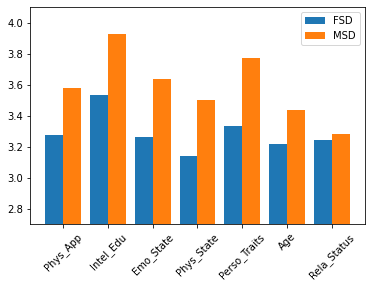

In [34]:
import matplotlib.pyplot as plt
X = ['Phys_App', 'Intel_Edu', 'Emo_State', 'Phys_State', 'Perso_Traits', 'Age', 'Rela_Status']
Ygirls = fem_f
Zboys = mal_f
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'FSD')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'MSD')
  
plt.xticks(X_axis, X)
plt.xticks(rotation=45)
plt.ylim(2.7, 4.1)  
plt.legend()
plt.show()

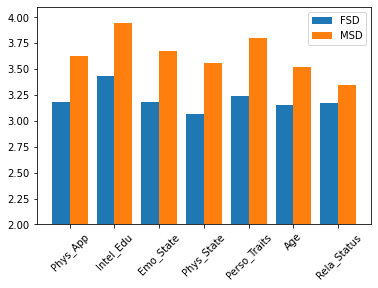

In [35]:
X = ['Phys_App', 'Intel_Edu', 'Emo_State', 'Phys_State', 'Perso_Traits', 'Age', 'Rela_Status']
Ygirls = fem_m
Zboys = mal_m
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'FSD')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'MSD')
  
plt.xticks(X_axis, X)
plt.xticks(rotation=45)
plt.ylim(2, 4.1)  
plt.legend()
plt.show()

# Frequency plots for the thesis

## to describe females

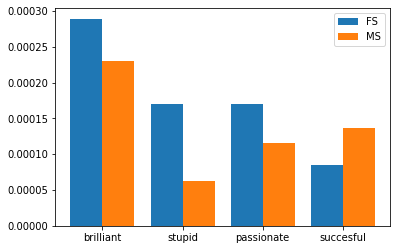

In [37]:
import numpy as np 
import matplotlib.pyplot as plt 

X = ['brilliant', 'stupid', 'passionate', 'succesful']

fs = [17, 10, 10, 5]
ms = [22, 6, 11, 13]

fem = [item/58758 for item in fs]
mal = [item/95627 for item in ms]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, fem, 0.4, label = 'FS')
plt.bar(X_axis + 0.2, mal, 0.4, label = 'MS')
  
plt.xticks(X_axis, X)
plt.legend()
plt.show()

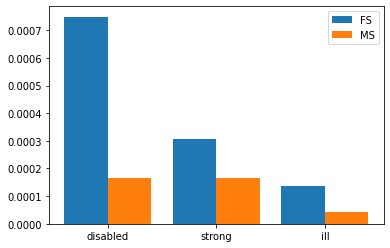

In [38]:
import numpy as np 
import matplotlib.pyplot as plt 

X = ['disabled', 'strong', 'ill']

fs = [44, 18, 8]
ms = [16, 16, 4]

fem = [item/58758 for item in fs]
mal = [item/95627 for item in ms]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, fem, 0.4, label = 'FS')
plt.bar(X_axis + 0.2, mal, 0.4, label = 'MS')
  
plt.xticks(X_axis, X)
plt.legend()
plt.show()

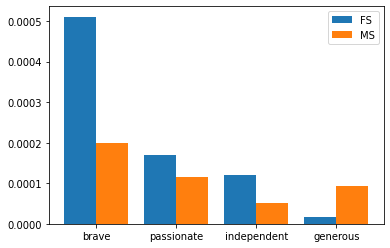

In [39]:
X = ['brave', 'passionate', 'independent', 'generous']

fs = [30, 10, 7, 1]
ms = [19, 11, 5, 9]

fem = [item/58758 for item in fs]
mal = [item/95627 for item in ms]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, fem, 0.4, label = 'FS')
plt.bar(X_axis + 0.2, mal, 0.4, label = 'MS')
  
plt.xticks(X_axis, X)
plt.legend()
plt.show()


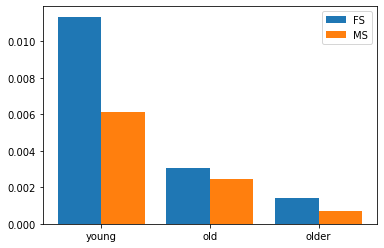

In [40]:

X = ['young', 'old', 'older']

fs = [667, 181, 84]
ms = [587, 233, 67]

fem = [item/58758 for item in fs]
mal = [item/95627 for item in ms]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, fem, 0.4, label = 'FS')
plt.bar(X_axis + 0.2, mal, 0.4, label = 'MS')
  
plt.xticks(X_axis, X)
plt.legend()
plt.show()


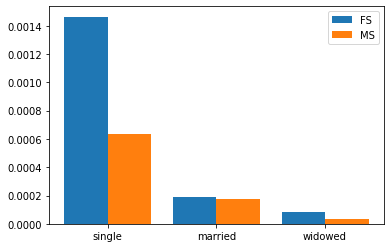

In [41]:

X = ['single', 'married', 'widowed']

fs = [86, 11, 5]
ms = [61, 17, 3]

fem = [item/58758 for item in fs]
mal = [item/95627 for item in ms]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, fem, 0.4, label = 'FS')
plt.bar(X_axis + 0.2, mal, 0.4, label = 'MS')
  
plt.xticks(X_axis, X)
plt.legend()
plt.show()


## to describe males

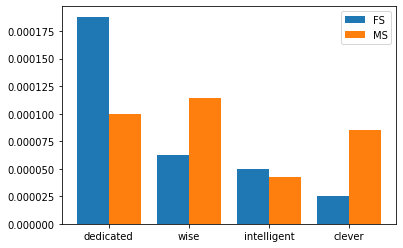

In [42]:

X = ['dedicated', 'wise', 'intelligent', 'clever']

fs = [15, 5, 4, 2]
ms = [21, 24, 9, 18]

fem = [item/79748 for item in fs]
mal = [item/210328 for item in ms]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, fem, 0.4, label = 'FS')
plt.bar(X_axis + 0.2, mal, 0.4, label = 'MS')
  
plt.xticks(X_axis, X)
plt.legend()
plt.show()


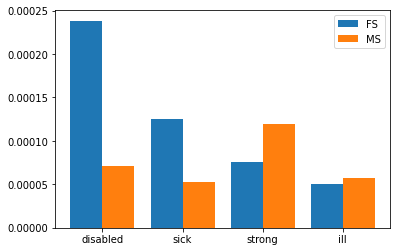

In [43]:

X = ['disabled', 'sick', 'strong', 'ill']

fs = [19, 10, 6, 4]
ms = [15, 11, 25, 12]

fem = [item/79748 for item in fs]
mal = [item/210328 for item in ms]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, fem, 0.4, label = 'FS')
plt.bar(X_axis + 0.2, mal, 0.4, label = 'MS')
  
plt.xticks(X_axis, X)
plt.legend()
plt.show()


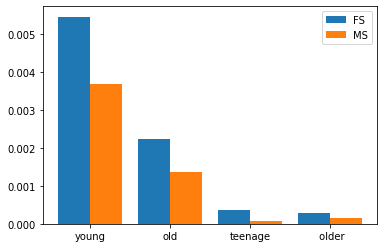

In [44]:

X = ['young', 'old', 'teenage', ' older']

fs = [435, 178, 28, 22]
ms = [775, 285, 15, 30]

fem = [item/79748 for item in fs]
mal = [item/210328 for item in ms]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, fem, 0.4, label = 'FS')
plt.bar(X_axis + 0.2, mal, 0.4, label = 'MS')
  
plt.xticks(X_axis, X)
plt.legend()
plt.show()


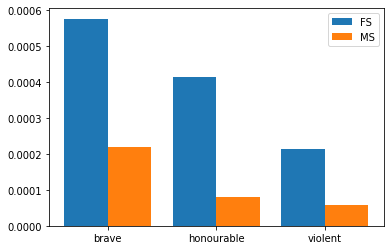

In [45]:

X = ['brave', 'honourable', 'violent']

fs = [46, 33, 17]
ms = [46, 17, 12]

fem = [item/79748 for item in fs]
mal = [item/210328 for item in ms]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, fem, 0.4, label = 'FS')
plt.bar(X_axis + 0.2, mal, 0.4, label = 'MS')
  
plt.xticks(X_axis, X)
plt.legend()
plt.show()
